In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
N = 500
d = 2

mu_1    = 5 * np.ones(d)
sigma_1 = np.identity(d)

mu_2    = -5 * np.ones(d)
sigma_2 = np.identity(d)

mixture_comp = np.random.randint(low=0, high=2, size=(N))

x = np.zeros((N, d))
x[mixture_comp == 0] = np.random.multivariate_normal(mean=mu_1, cov=sigma_1, size=(N))[mixture_comp == 0]
x[mixture_comp == 1] = np.random.multivariate_normal(mean=mu_2, cov=sigma_2, size=(N))[mixture_comp == 1]

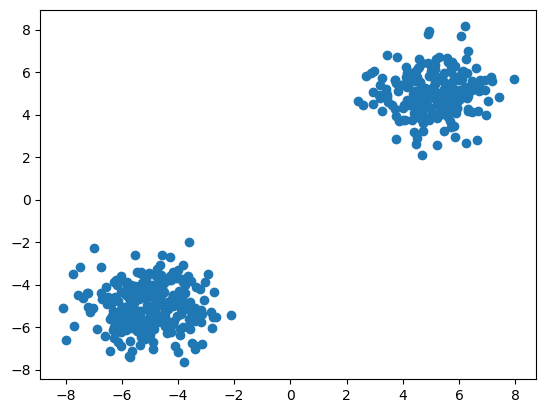

In [22]:
plt.scatter(x[:,0],x[:,1])